In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:

# Cargar CSV
df_iter = pd.read_csv("resultadositer.csv")
df_n = pd.read_csv("resultadosn.csv")
df_nest = pd.read_csv("resultadosnests.csv")
df_todo = pd.read_csv("resultadostodo.csv")

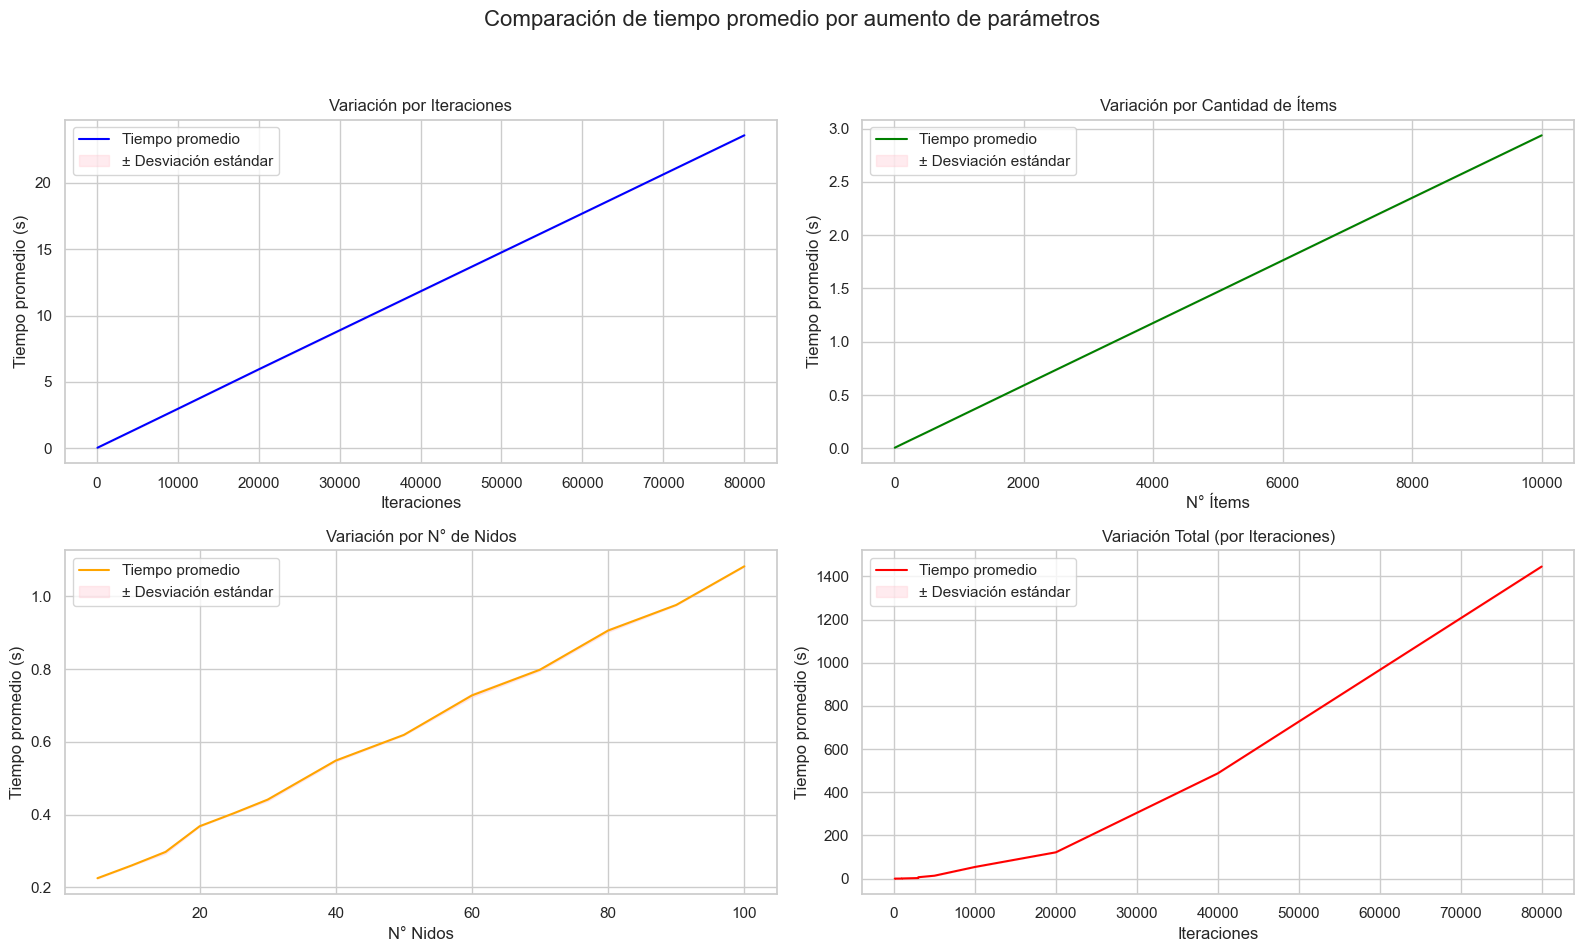

In [25]:
# Crear la figura
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Comparación de tiempo promedio por aumento de parámetros", fontsize=16)

# Subplot 1: max_iter
axs[0, 0].plot(df_iter["max_iter"], df_iter["avg_time"], label="Tiempo promedio", color="blue")
axs[0, 0].fill_between(df_iter["max_iter"],
                       df_iter["avg_time"] - df_iter["std_dev"],
                       df_iter["avg_time"] + df_iter["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[0, 0].set_title("Variación por Iteraciones")
axs[0, 0].set_xlabel("Iteraciones")
axs[0, 0].set_ylabel("Tiempo promedio (s)")
axs[0, 0].legend()

# Subplot 2: n_items
axs[0, 1].plot(df_n["n_items"], df_n["avg_time"], label="Tiempo promedio", color="green")
axs[0, 1].fill_between(df_n["n_items"],
                       df_n["avg_time"] - df_n["std_dev"],
                       df_n["avg_time"] + df_n["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[0, 1].set_title("Variación por Cantidad de Ítems")
axs[0, 1].set_xlabel("N° Ítems")
axs[0, 1].set_ylabel("Tiempo promedio (s)")
axs[0, 1].legend()

# Subplot 3: n_nests
axs[1, 0].plot(df_nest["n_nests"], df_nest["avg_time"], label="Tiempo promedio", color="orange")
axs[1, 0].fill_between(df_nest["n_nests"],
                       df_nest["avg_time"] - df_nest["std_dev"],
                       df_nest["avg_time"] + df_nest["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[1, 0].set_title("Variación por N° de Nidos")
axs[1, 0].set_xlabel("N° Nidos")
axs[1, 0].set_ylabel("Tiempo promedio (s)")
axs[1, 0].legend()

# Subplot 4: total (usando max_iter como eje representativo)
axs[1, 1].plot(df_todo["max_iter"], df_todo["avg_time"], label="Tiempo promedio", color="red")
axs[1, 1].fill_between(df_todo["max_iter"],
                       df_todo["avg_time"] - df_todo["std_dev"],
                       df_todo["avg_time"] + df_todo["std_dev"],
                       color="pink", alpha=0.3, label="± Desviación estándar")
axs[1, 1].set_title("Variación Total (por Iteraciones)")
axs[1, 1].set_xlabel("Iteraciones")
axs[1, 1].set_ylabel("Tiempo promedio (s)")
axs[1, 1].legend()

# Ajustar layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

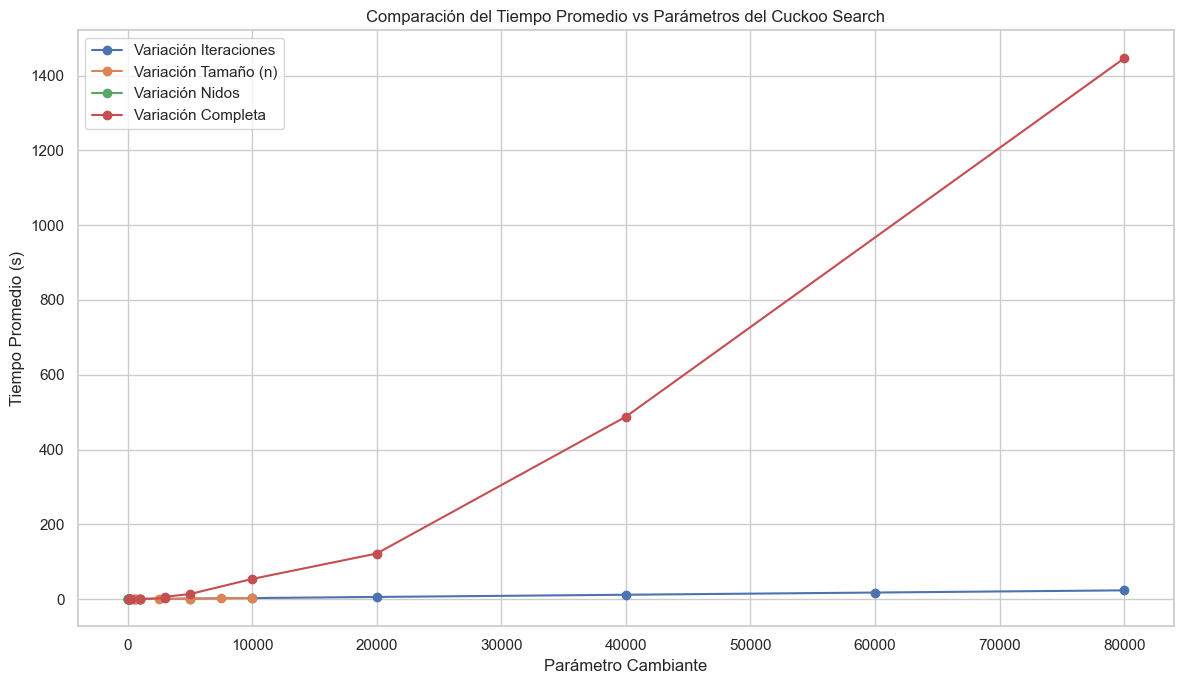

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar cada CSV por separado
df_iter = pd.read_csv("resultadositer.csv")
df_n = pd.read_csv("resultadosn.csv")
df_nest = pd.read_csv("resultadosnests.csv")
df_todo = pd.read_csv("resultadostodo.csv")

# Crear el gráfico
plt.figure(figsize=(12, 7))

# Graficar cada conjunto con su desviación estándar como banda
plt.plot(df_iter['max_iter'], df_iter['avg_time'], label='Variación Iteraciones', marker='o')
plt.fill_between(df_iter['max_iter'],
                 df_iter['avg_time'] - df_iter['std_dev'],
                 df_iter['avg_time'] + df_iter['std_dev'],
                 alpha=0.2)

plt.plot(df_n['n_items'], df_n['avg_time'], label='Variación Tamaño (n)', marker='o')
plt.fill_between(df_n['n_items'],
                 df_n['avg_time'] - df_n['std_dev'],
                 df_n['avg_time'] + df_n['std_dev'],
                 alpha=0.2)

plt.plot(df_nest['n_nests'], df_nest['avg_time'], label='Variación Nidos', marker='o')
plt.fill_between(df_nest['n_nests'],
                 df_nest['avg_time'] - df_nest['std_dev'],
                 df_nest['avg_time'] + df_nest['std_dev'],
                 alpha=0.2)

plt.plot(df_todo['max_iter'], df_todo['avg_time'], label='Variación Completa', marker='o')
plt.fill_between(df_todo['max_iter'],
                 df_todo['avg_time'] - df_todo['std_dev'],
                 df_todo['avg_time'] + df_todo['std_dev'],
                 alpha=0.2)

# Personalización del gráfico
plt.title("Comparación del Tiempo Promedio vs Parámetros del Cuckoo Search")
plt.xlabel("Parámetro Cambiante")
plt.ylabel("Tiempo Promedio (s)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fórmula aproximada (grado 2):
            2
-1.839e-11 x + 0.0002962 x - 8.002e-05
Coeficiente de determinación R²: 1.0000


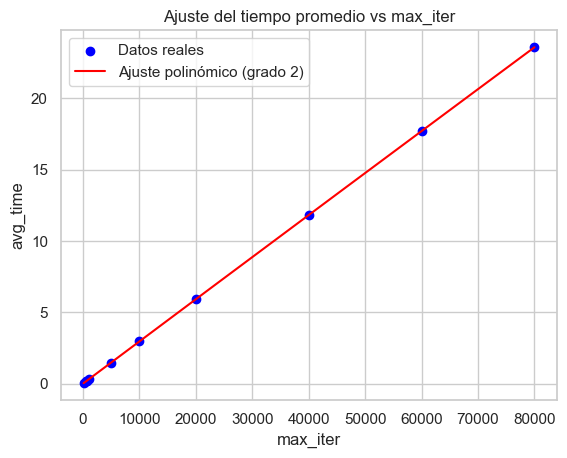

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial
from sklearn.metrics import r2_score

# Usamos df_iter como ejemplo (donde varía max_iter)
x = df_iter['max_iter'].values
y = df_iter['avg_time'].values

# Ajuste polinómico de grado 2 (puedes probar otros grados)
grado = 2
coef = np.polyfit(x, y, grado)
modelo = np.poly1d(coef)

# Predicciones
x_line = np.linspace(min(x), max(x), 500)
y_line = modelo(x_line)

# Mostrar fórmula
print(f"Fórmula aproximada (grado {grado}):")
print(modelo)

# R²
r2 = r2_score(y, modelo(x))
print(f"Coeficiente de determinación R²: {r2:.4f}")

# Graficar
plt.scatter(x, y, label="Datos reales", color="blue")
plt.plot(x_line, y_line, label=f"Ajuste polinómico (grado {grado})", color="red")
plt.title("Ajuste del tiempo promedio vs max_iter")
plt.xlabel("max_iter")
plt.ylabel("avg_time")
plt.legend()
plt.grid(True)
plt.show()


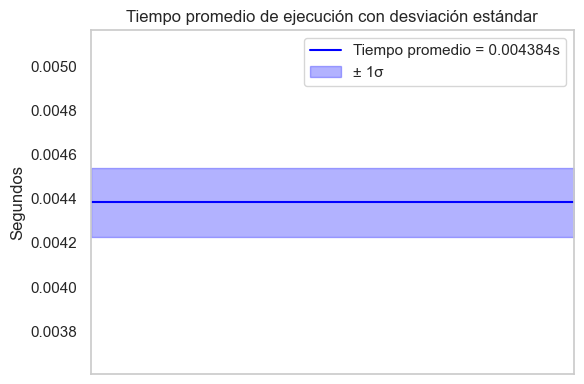

In [32]:
import matplotlib.pyplot as plt

mean_time = 0.00438426
std_dev = 0.000155507

plt.figure(figsize=(6, 4))
plt.axhline(mean_time, color='blue', label=f'Tiempo promedio = {mean_time:.6f}s')
plt.fill_between([0, 1], mean_time - std_dev, mean_time + std_dev, color='blue', alpha=0.3, label='± 1σ')

plt.xlim(0, 1)
plt.ylim(mean_time - std_dev * 5, mean_time + std_dev * 5)
plt.title("Tiempo promedio de ejecución con desviación estándar")
plt.ylabel("Segundos")
plt.legend()
plt.xticks([])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


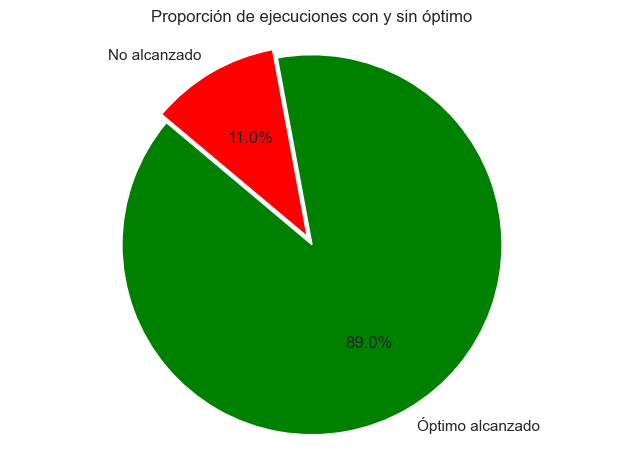

In [33]:
labels = ['Óptimo alcanzado', 'No alcanzado']
sizes = [8903, 10000-8903]
colors = ['green', 'red']
explode = (0.05, 0)  # para destacar el óptimo

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Proporción de ejecuciones con y sin óptimo")
plt.axis('equal')
plt.tight_layout()
plt.show()
